<a href="https://colab.research.google.com/github/Preksha-D/Synapse_LP/blob/week4/Synapse_LP_Task_4_Preksha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
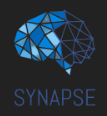

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Nan values

In [3]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
df.info()   #since very few rows have nan values compared to the size of the data set we can drop it
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15

## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [4]:
#Write your code here
for i in ['relationship', 'race', 'sex']:
  avg = df.groupby(i)['fnlwgt'].mean()
  print(i + f" : {avg.max()}")

relationship : 206017.29921259842
race : 228807.4554490593
sex : 191650.24607458292


## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [5]:
df = df.drop('education-num',axis=1)

In [6]:
#write your code here
combi = df.groupby(['relationship', 'marital-status']).size()
solo = df['relationship'].unique()

print(combi)
print(solo)

relationship    marital-status       
Husband         Married-AF-spouse            9
                Married-civ-spouse       12454
Not-in-family   Divorced                  2268
                Married-civ-spouse          14
                Married-spouse-absent      181
                Never-married             4448
                Separated                  383
                Widowed                    432
Other-relative  Divorced                   103
                Married-AF-spouse            1
                Married-civ-spouse         118
                Married-spouse-absent       26
                Never-married              548
                Separated                   53
                Widowed                     40
Own-child       Divorced                   308
                Married-AF-spouse            1
                Married-civ-spouse          83
                Married-spouse-absent       43
                Never-married             3929
                Separa

It can be explained just by marital status column. So we can drop relationship column.

In [6]:
df = df.drop('relationship',axis=1)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [7]:
#Write your code here
df = pd.get_dummies(df, columns=['marital-status', 'sex', 'race'], dtype=int)
df.head()

,age,workclass,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,...,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,State-gov,77516,Bachelors,Adm-clerical,2174,0,40,United-States,<=50K,...,1,0,0,0,1,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,0,0,13,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,1
2,38,Private,215646,HS-grad,Handlers-cleaners,0,0,40,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,1
3,53,Private,234721,11th,Handlers-cleaners,0,0,40,United-States,<=50K,...,0,0,0,0,1,0,0,1,0,0
4,28,Private,338409,Bachelors,Prof-specialty,0,0,40,Cuba,<=50K,...,0,0,0,1,0,0,0,1,0,0


In [8]:
from sklearn import preprocessing

df['workclass']= preprocessing.LabelEncoder().fit_transform(df['workclass'])
df['education']= preprocessing.LabelEncoder().fit_transform(df['education'])
df['occupation']= preprocessing.LabelEncoder().fit_transform(df['occupation'])
df['native-country']= preprocessing.LabelEncoder().fit_transform(df['native-country'])
df.head()

,age,workclass,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,...,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,5,77516,9,0,2174,0,40,38,<=50K,...,1,0,0,0,1,0,0,0,0,1
1,50,4,83311,9,3,0,0,13,38,<=50K,...,0,0,0,0,1,0,0,0,0,1
2,38,2,215646,11,5,0,0,40,38,<=50K,...,0,0,0,0,1,0,0,0,0,1
3,53,2,234721,1,5,0,0,40,38,<=50K,...,0,0,0,0,1,0,0,1,0,0
4,28,2,338409,9,9,0,0,40,4,<=50K,...,0,0,0,1,0,0,0,1,0,0


## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [9]:
#write your code here
df['income'] = df['income'].replace('<=50K', 0)
df['income'] = df['income'].replace('>50K', 1)


<ipython-input-9-5bf2e61301e5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace('>50K', 1)


In [10]:
df

,age,workclass,fnlwgt,education,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,...,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,5,77516,9,0,2174,0,40,38,0,...,1,0,0,0,1,0,0,0,0,1
1,50,4,83311,9,3,0,0,13,38,0,...,0,0,0,0,1,0,0,0,0,1
2,38,2,215646,11,5,0,0,40,38,0,...,0,0,0,0,1,0,0,0,0,1
3,53,2,234721,1,5,0,0,40,38,0,...,0,0,0,0,1,0,0,1,0,0
4,28,2,338409,9,9,0,0,40,4,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,0,0,38,38,0,...,0,0,0,1,0,0,0,0,0,1
32557,40,2,154374,11,6,0,0,40,38,1,...,0,0,0,0,1,0,0,0,0,1
32558,58,2,151910,11,0,0,0,40,38,0,...,0,0,1,1,0,0,0,0,0,1
32559,22,2,201490,11,0,0,0,20,38,0,...,1,0,0,0,1,0,0,0,0,1


**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [11]:
#write your code here
from sklearn.model_selection import train_test_split

y = df['income']
X = df.drop(['income'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21113, 23)
(9049, 23)
(21113,)
(9049,)


### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

- boolean data / probabilty
- s curve
- not easy to compare to more complex graphs

Coefficients

- we change 0 - 1 range to log (p/1-p) p is probabilty - scale changes to - infin to infinity
- s curve becomes straight line
- Using discrete data : we find the log of odds for each discrete data →  then apply t test formula

We can use it to find accuracy, precision and prediction based on probabilty. It is a classifier

In [12]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Find the accuracy and confusion matrix for the same and explain what it shows.

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

lr_accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(lr_accuracy)
print(confusion)

0.7852801414520941
[[6434  310]
 [1633  672]]


The accuracy is quite good, and the algo most predictions and actual values matched.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

uses bayes theorem of probabilty. Sees how many times each feature is repeated and their probabilty to make predictions

In [14]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
nb_accuracy

0.7868272737319041

# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

similar to descision tree of OR. we have all our possiblities, here we try to keep them binary and also try to avoid overfitting


In [15]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.8129075035915571

<b>Print the Model Accuracy</b>

## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans: Logistic: It has binary data so it then predicts the probabilty of the data
Accuracy might be lower cause the data might not be purely linear

Naive Bayes: It uses bayes theorem of probabilty to find the probabilty of each feature and use that to make its prediction.
Accuracy might be lower cause real world data is rarely completely independant

Descision Tree: It splits the data into based on certain conditions(feature) and uses if-then rules to form the tree.
Acurracy is highest cause this works even for non linear data and has no prior assumptions about the data set

### Mention some real life use cases for each of these three models:

Ans: Logistic: Medicine, Text editing, Credit Score

Naive Bayes: Spam Filtering, Document classification, Senitiment analysis

Decision Tree: Health Care, Customer Relationship Management, Recommendation Systems


Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [16]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     # 'max_depth' : [2,24,12,32,9],
#     'min_samples_split' : 653
#     # 'min_samples_leaf' : [70,60,50]
# }


dt_model = DecisionTreeClassifier(max_depth=40, min_samples_split=300, min_samples_leaf = 203)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

dthyp_accuracy = accuracy_score(y_test, y_pred)

# grid_search = GridSearchCV(model, param_grid=param_grid,cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# dt_model = grid_search.best_estimator_
# y_pred = dt_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
dthyp_accuracy


0.8450657531218919

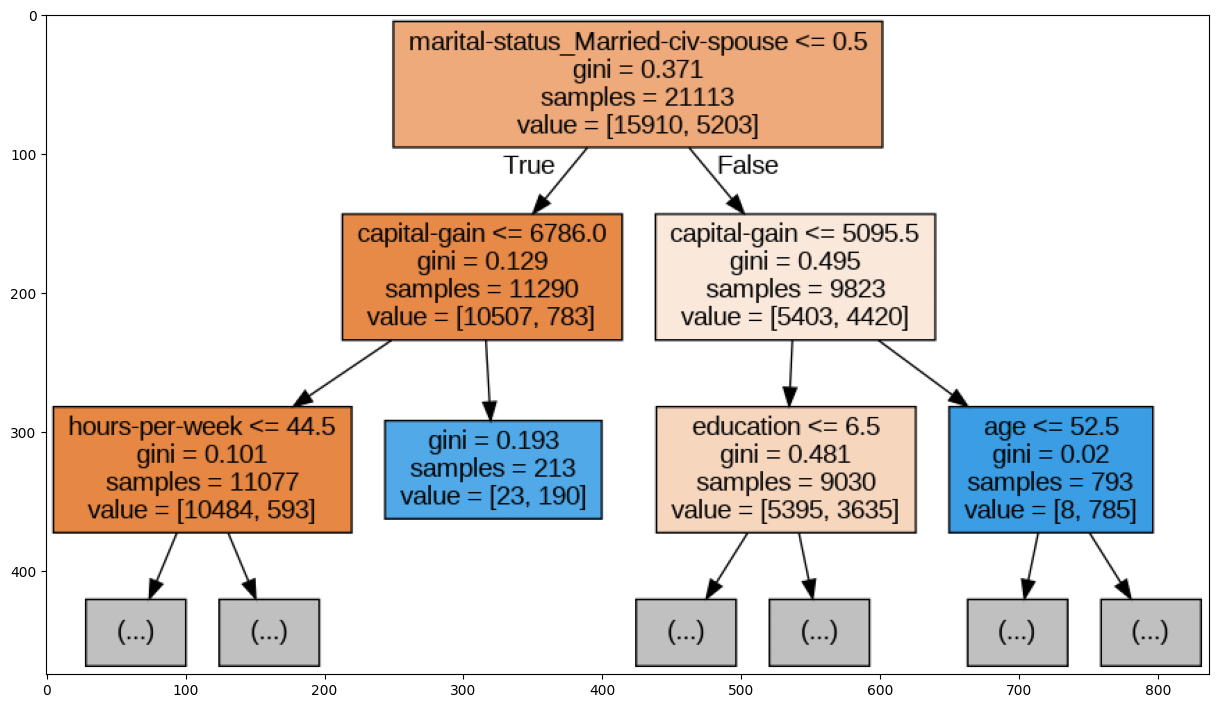

In [17]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [18]:
#write code here

### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans: max_depth: its the amount of child levels created (so for only max_depth = 2, only 2 layers were created below the main node + accuracy was less than 80%)

min_smaple_split: no of elements needed at minimum in a node to split, makes its more accurate ( in just 1 input, as the no. increased so did the accuraccy)

min_sample_leaf = minimum no of smaples present, same observation as spit

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [23]:
#implement Random forest
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap' : [True, False],
    'max_depth' : [24,12,3,9],
    'min_samples_split' : [5,17,24],
    'n_estimators' : [5,24,58]
}

rf = RandomForestClassifier()
rfgrid_search = GridSearchCV(rf, param_grid=param_grid,cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
rfgrid_search.fit(X_train, y_train)
rf_model = rfgrid_search.best_estimator_
y_pred = rf_model.predict(X_test)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [24]:
#find the accuracy
for_accuracy = accuracy_score(y_test, y_pred)
for_accuracy

0.8612001326113383

### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans:  Decision tree: work great with data used to train them but nit flexible when it comes to new samples. less accurate
Random forest: made of many decision trees. combine simplicity od decision tree with flexibilty increasing accuracy. We make decision trees using bootstrapped data(basically randomly selected samples) and using random subsets of columns. Prediction is made by running data through all trees and the most common ans is the final prediction.

if the random forest has only one decision tree and all the columns are used to make it

In [25]:
#write a code to implement BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(DecisionTreeClassifier(max_depth=40, min_samples_split=300, min_samples_leaf = 203))
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
bag_accuracy = accuracy_score(y_test, y_pred)
bag_accuracy

0.8437396397391977

### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans: Bagging can use any classifier method while random forest is a type of bagging with only decision trees

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

ada boost: uses weak learners/stumps not trees (only 1 node with 2 children). Some stumps have more say in classfication (no democracy here). Stump made by keeping mistakes of previous in mind (woo growth!). If stump error is less, its weight is more!

In [26]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators =242)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred)
ada_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8659520388993259

Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

XGBoost made for large and complicated datasets. we find residuals (diff from the probability). the we find similarity score. the we split observation based on some threshold and find similairty score there and gain (we want the max gain) and keep making such branches using these, until we hit the tree level limit

In [30]:
import xgboost as xgb

xg = xgb.XGBClassifier(n_estimators=30, random_state=43)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
xg_accuracy = accuracy_score(y_test, y_pred)
xg_accuracy

0.8711459829815449

### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans: AdaBoost: Weak learners used, made by mistakes of previous learners
XGBoost: better for large, more complex data. Can handle missing data. more efficient and more accurate

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans: Bagging: Many model made with random data, and have equal weight in final decision. Uninfluenced by each other
Boosting: Each model has weight assigned based on their accuracy. Influenced by the mistakes of the previous model

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



we prune xgboost when the (gain - gamma) is -ve. It is helpful to make sure we don't overfit and makes the model simpler

In [31]:
#implement pruning
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
# ccp_alphas, impurities = path.ccp_alphas, path.impurities
# clfs = []
# for ccp_alpha in ccp_alphas:
#     clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#     clf.fit(X_train, y_train)
#     clfs.append(clf.score)

param_grid = {"ccp_alpha": path.ccp_alphas}
prune_search = GridSearchCV(dt_model, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy' )
prune_search.fit(X_train, y_train)
prune = prune_search.best_estimator_
y_pred =prune.predict(X_test)
prune_accuracy = accuracy_score(y_test, y_pred)
prune_accuracy


Fitting 3 folds for each of 68 candidates, totalling 204 fits


0.8451762625704498

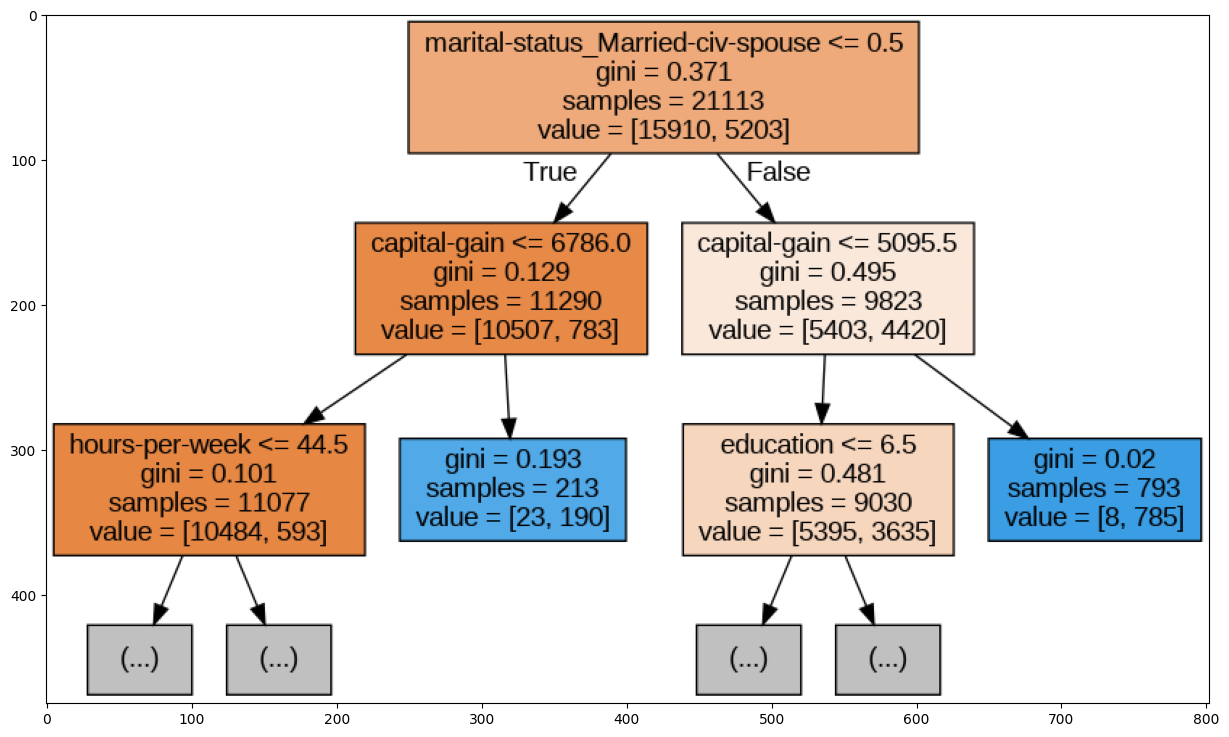

In [32]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
decision_tree = tree.export_graphviz(prune, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [ ]:
#write your code here

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

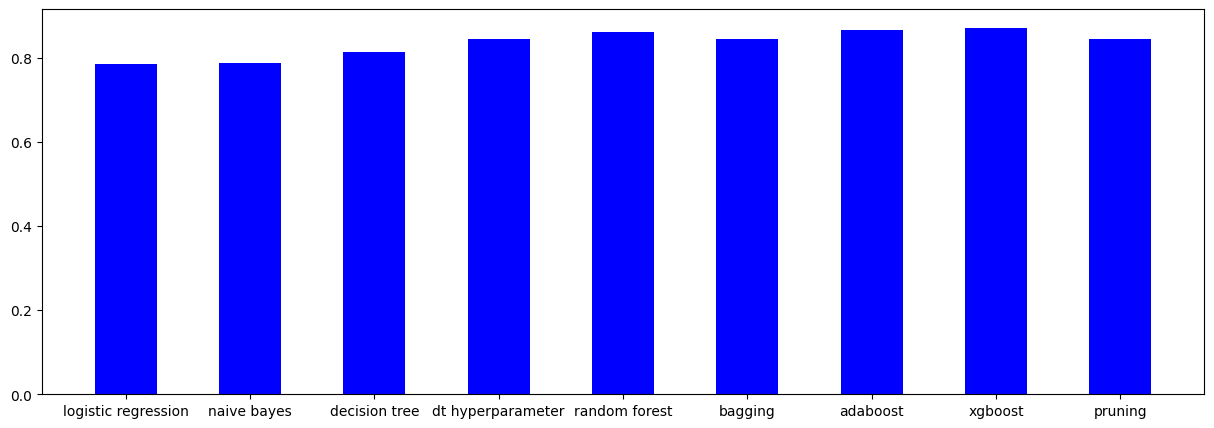

In [39]:
#write your code here
import matplotlib.pyplot as plt

accuracies = [lr_accuracy, nb_accuracy, dt_accuracy, dthyp_accuracy, for_accuracy, bag_accuracy, ada_accuracy, xg_accuracy, prune_accuracy]
names = ['logistic regression', 'naive bayes', 'decision tree', 'dt hyperparameter', 'random forest', 'bagging', 'adaboost', 'xgboost', 'pruning']
fig = plt.figure(figsize = (15, 5))
plt.bar(names, accuracies, color = 'blue', width = 0.5)
plt.show()

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025